# Stack

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re

from shutil import unpack_archive
unpack_archive('clean_2019.csv.zip')


In [3]:
survey = Table.read_table('clean_2019.csv')

In [4]:
survey.show(3)

Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,filters,String stuff
3,"I am not primarily a developer, but I write code sometim ...",Yes,Never,The quality of OSS and closed source software is about t ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or tool witho ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-end;Develo ...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new opportunities",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies I'd be wor ...",I was preparing for a job search,THB,Thai baht,23000,Monthly,8820,40,There's no schedule or spec; I work on what seems most i ...,Distracting work environment;Inadequate access to necess ...,Less than once per month / Never,Home,Average,No,nan,"No, but I think we should",Not sure,I have little or no influence,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,nan,nan,nan,Other(s):,nan,nan,Vim;Visual Studio Code,Linux-based,I do not use containers,nan,nan,Yes,Yes,Yes,Reddit,In real life (in person),Username,2011,A few times per week,Find answers to specific questions;Learn how to do thing ...,6-10 times per week,They were about the same,nan,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a private Q ...",Neutral,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technolog ...,28,Man,No,Straight / Heterosexual,nan,Yes,Appropriate in length,Neither easy nor difficult,False,False
4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about t ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engi ...",Taken an online course in programming or software develo ...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Interview wit ...",No,"Languages, frameworks, and other technologies I'd be wor ...",I was preparing for a job search,USD,United States dollar,61000,Yearly,61000,80,There's no schedule or spec; I work on what seems most i ...,nan,Less than once per month / Never,Home,A little below average,No,nan,"No, but I think we should",Developers typically have the most influence on purchasi ...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,nan,nan,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the time / relax,1-2 times per week,Stack Over

# 1) get the avrage french salary

---

In [6]:
fr = survey.where('Country', are.equal_to('France'))
fr.show(2)

Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,filters,String stuff
57,"I am not primarily a developer, but I write code sometim ...",Yes,Never,"OSS is, on average, of HIGHER quality than proprietary / ...",Employed full-time,France,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance, marketing)",Taken an online course in programming or software develo ...,"10,000 or more employees",nan,2,29,Less than 1 year,Very satisfied,Very satisfied,Not at all confident,No,No,I am actively looking for a job,NA - I am an independent contractor or self employed,Interview with people in peer roles;Interview with peopl ...,No,Financial performance or funding status of the company o ...,"Something else changed (education, award, media, etc.)",EUR,European Euro,85000,Yearly,97389,40,There's no schedule or spec; I work on what seems most i ...,Lack of support from management;Meetings;Toxic work envi ...,A few days each month,"Other place, such as a coworking space or cafe",Far above average,No,nan,"No, but I think we should","The CTO, CIO, or other management purchase new technolog ...",I have little or no influence,JavaScript;Python,Elixir;JavaScript;Python;TypeScript,Firebase;MongoDB,DynamoDB;Firebase;MongoDB;Redis,Linux;Windows,AWS;Docker;Google Cloud Platform;Kubernetes;Linux;Raspbe ...,React.js,React.js,Node.js,Node.js,Notepad++;Visual Studio Code,Linux-based,Development;Testing;Production,Not at all,Useful across many domains and could change many aspects ...,No,SIGH,What?,WhatsApp,In real life (in person),UserID,2013,Daily or almost daily,Find answers to specific questions,6-10 times per week,Stack Overflow was much faster,60+ minutes,Yes,I have never participated in Q&A on Stack Overflow,"No, I knew that Stack Overflow had a job board but have ...","No, I've heard of them, but I am not part of a private Q ...","No, not really",Not applicable - I did not use Stack Overflow last year,Tech articles written by other developers;Industry news ...,31,Man,No,Straight / Heterosexual,nan,No,Appropriate in length,Easy,False,False
196,I am a developer by profession,Yes,Less than once a month but more than once per year,The quality of OSS and closed source software is about t ...,Employed full-time,France,"Yes, part-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or software engi ...",Taken an online course in programming or software develo ...,20 to 99 employees,"Developer, back-end;Developer, full-stack",20,8,16,Neither satisfied nor dissatisfied,Very dissatisfied,Not at all confident,Yes,I am already a manager,"I’m not actively looking, but I am open to new opportunities",More than 4 years ago,Interview with people in peer roles;Interview with peopl ...,No,"Languages, frameworks, and other technologies I'd be wor ...",I had a negative experience or interaction at work,EUR,European Euro,39000,Yearly,44684,37,There is a schedule and/or spec (made by me or by a coll ...,Lack of support from management;Not enough people for th ...,It's compli

---

In [10]:
def isNotString(x):
    try:
        float(x)
        return True
    except:
        return False

def isNotNan(x):
    return not np.isnan(float(x))

In [13]:
frConvertedComp = fr.select('ConvertedComp').where('ConvertedComp', isNotNan).column('ConvertedComp')

In [14]:
frConvertedComp

array([ 97389.,  44684.,  50700., ..., 329976.,  49840.,  57287.])

In [15]:
np.average(frConvertedComp)

87213.45406125166

In [18]:
age = fr.select('Age').where('Age', isNotNan).column('Age')

In [19]:
np.average(age)

31.017088174982913

# 2) Display a scatter plot of ConvertedCompensation vs years of code

In [75]:
tbl = fr.where('ConvertedComp', isNotString).where('YearsCodePro', isNotString)
tbl = tbl.where('YearsCodePro', isNotNan)
tbl = tbl.where('CurrencySymbol', are.equal_to('EUR'))

In [70]:
YearsCodePro = tbl.select('YearsCodePro').column('YearsCodePro').astype('float')
YearsCodePro

array([16.,  1.,  3., ...,  3.,  4., 10.])

In [74]:
clean = Table().with_columns(
    'YearsCodePro', YearsCodePro,
     'ConvertedComp', tbl.column('ConvertedComp')
)
clean.show(3)

YearsCodePro,ConvertedComp
16,44684
1,46992
3,54996


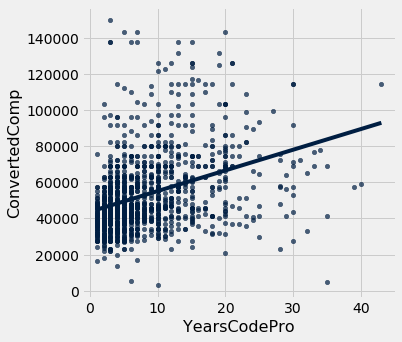

In [72]:
clean.where('ConvertedComp', are.below(150000)).scatter('YearsCodePro', 'ConvertedComp', fit_line=True)

In [73]:
fr.sort('ConvertedComp').select('ConvertedComp', 'CurrencySymbol')

ConvertedComp,CurrencySymbol
3094,EUR
4583,EUR
5156,EUR
13749,EUR
16499,EUR
17186,EUR
18332,EUR
19478,EUR
19884,SEK
20623,EUR


In [77]:
age = clean.with_column('Age', tbl.column('Age'))

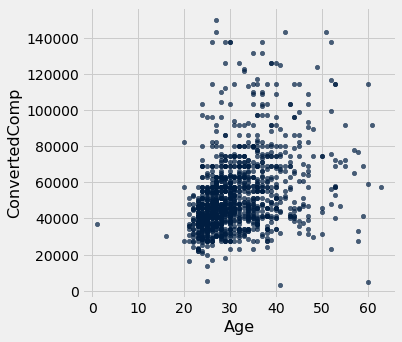

In [79]:
age.where('ConvertedComp', are.below(150000)).scatter('Age', 'ConvertedComp')

---

# 3) Salary comparaison across categories

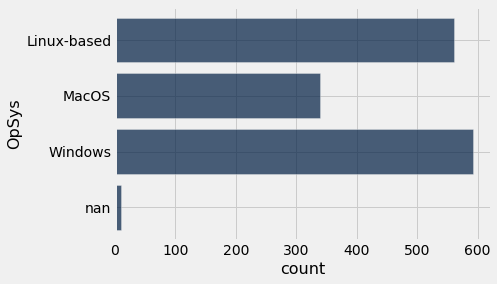

In [85]:
fr.group('OpSys').barh('OpSys')

In [104]:
opSys = fr.where('ConvertedComp', isNotNan).group('OpSys', np.average).sort('ConvertedComp average')

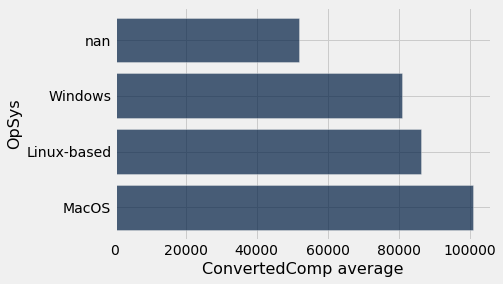

In [106]:
opSys.select('OpSys' ,'ConvertedComp average').barh('OpSys')

In [125]:
gen = survey.where('ConvertedComp', isNotNan).group('Gender', np.average).select('Gender', 'ConvertedComp average')
gen

Gender,ConvertedComp average
Man,134807
"Man;Non-binary, genderqueer, or gender non-conforming",111132
"Non-binary, genderqueer, or gender non-conforming",188159
Woman,122525
Woman;Man,34510.6
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",61044.6
"Woman;Non-binary, genderqueer, or gender non-conforming",118641
nan,155546


In [126]:
def isBinary(x):
    return x == 'Man' or x == 'Woman'

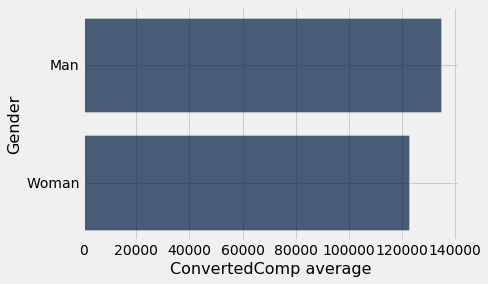

In [128]:
gen.where("Gender", isBinary).barh('Gender')

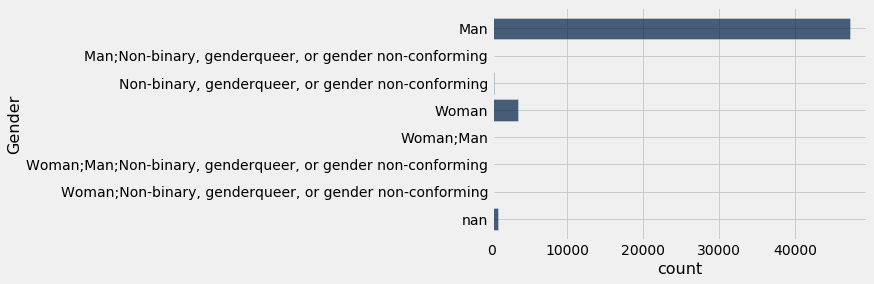

In [129]:
survey.group('Gender').barh('Gender')